In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
def make_model(n_inputs, intermediate_layer, n_classes, task):

    '''
        Simple 3 layer DNN
    '''

    model = Sequential()
    model.add(Dense(n_inputs, activation = 'relu'))
    model.add(Dense(intermediate_layer, activation = 'relu'))
    if task == 'regression':
        model = Sequential()
        model.add(Dense(n_inputs, activation = 'linear', kernel_initializer = 'normal'))
        model.add(Dense(intermediate_layer, activation = 'linear', kernel_initializer = 'normal'))
        model.add(Dense(n_classes, activation = 'linear'))
        model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    elif task == 'multi':
        model.add(Dense(n_classes, activation = 'softmax'))
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    elif task == 'binary':
        model.add(Dense(n_classes, activation = 'sigmoid'))
        model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    # to be continued

    return model

In [25]:
# create classification and regression datasets
X_reg, Y_reg = make_regression(5000, 50) # simple regression problem with default parameters, follow a normal distribution
X_class, Y_class = make_classification(5000, 50, 5)

# Split into training and testing sets
xreg_train, xreg_test, yreg_train, yreg_test = train_test_split(X_reg, Y_reg, test_size = 0.3)
xclass_train, xclass_test, yclass_train, yclass_test = train_test_split(X_class, Y_class, test_size = 0.3, stratify = Y_class)


Text(0.5, 1.0, 'Distributions of train and test targets')

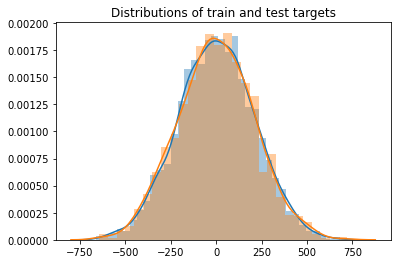

In [55]:
sns.distplot(yreg_train)
sns.distplot(yreg_test)
plt.title('Distributions of train and test targets')

In [63]:
# instantiate the model
modello = make_model(50, 10, 1, 'regression')

In [64]:
modello.fit(xreg_train, yreg_train, epochs=10, validation_data = (xreg_test, yreg_test))

Epoch 1/10
110/110 [==============================] - 1s 3ms/step - loss: 41123.4036 - val_loss: 38861.7891
Epoch 2/10
110/110 [==============================] - 0s 2ms/step - loss: 33252.7662 - val_loss: 14725.6611
Epoch 3/10
110/110 [==============================] - 0s 2ms/step - loss: 9024.5675 - val_loss: 888.7562
Epoch 4/10
110/110 [==============================] - 0s 2ms/step - loss: 413.8864 - val_loss: 16.5702
Epoch 5/10
110/110 [==============================] - 0s 2ms/step - loss: 8.0703 - val_loss: 0.4887
Epoch 6/10
110/110 [==============================] - 0s 2ms/step - loss: 0.2503 - val_loss: 0.0189
Epoch 7/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 5.3155e-04
Epoch 8/10
110/110 [==============================] - 0s 2ms/step - loss: 2.5558e-04 - val_loss: 9.9976e-06
Epoch 9/10
110/110 [==============================] - 0s 2ms/step - loss: 4.9388e-06 - val_loss: 1.4804e-07
Epoch 10/10
110/110 [==============================] - 0

In [71]:
# Introducing some noise in the data
X_reg, Y_reg = make_regression(5000, 50, bias = 3.9, noise=1.5) # simple regression problem with default parameters, follow a normal distribution
# Split into training and testing sets
xreg_train, xreg_test, yreg_train, yreg_test = train_test_split(X_reg, Y_reg, test_size = 0.3)
# instantiate the model
modello = make_model(50, 10, 1, 'regression')
modello.fit(xreg_train, yreg_train, epochs=10, validation_data = (xreg_test, yreg_test))

Epoch 1/10
110/110 [==============================] - 1s 3ms/step - loss: 41343.1840 - val_loss: 35378.5391
Epoch 2/10
110/110 [==============================] - 0s 2ms/step - loss: 28995.4947 - val_loss: 12123.0850
Epoch 3/10
110/110 [==============================] - 0s 2ms/step - loss: 7277.0450 - val_loss: 723.6207
Epoch 4/10
110/110 [==============================] - 0s 2ms/step - loss: 417.9209 - val_loss: 43.7222
Epoch 5/10
110/110 [==============================] - 0s 2ms/step - loss: 28.0625 - val_loss: 5.3000
Epoch 6/10
110/110 [==============================] - 0s 2ms/step - loss: 3.9939 - val_loss: 2.4009
Epoch 7/10
110/110 [==============================] - 0s 2ms/step - loss: 2.3464 - val_loss: 2.2076
Epoch 8/10
110/110 [==============================] - 0s 2ms/step - loss: 2.2737 - val_loss: 2.2303
Epoch 9/10
110/110 [==============================] - 0s 2ms/step - loss: 2.2413 - val_loss: 2.2031
Epoch 10/10
110/110 [==============================] - 0s 2ms/step - loss: 

In [72]:
modello.predict(xreg_test)

array([[-129.2157  ],
       [ 195.34398 ],
       [-202.59885 ],
       ...,
       [ -76.02063 ],
       [  21.68125 ],
       [  67.032845]], dtype=float32)